# **EDA and Preprocessing**

Objective:
The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.


**Data Exploration:**

  a) Explore the data

  b) list down the unique values in each feature and find its length.

  c) Perform the statistical analysis and renaming of the columns.


In [203]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler,LabelEncoder
from scipy.stats import skew,zscore,kurtosis

a) Explore the data

In [204]:
#Loading the dataset
df= pd.read_csv('Employee.csv')

In [205]:
#checking the first few rows
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [206]:
#getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [207]:
#getting the summary of each column
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


b) list down the unique values in each feature and find its length.

In [208]:
for col in df.columns:
  unique_val= df[col].unique()
  print(f"{col}: {unique_val[:len(unique_val)]} \n Length of unique values =",len(unique_val),'\n')

Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] 
 Length of unique values = 7 

Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] 
 Length of unique values = 30 

Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] 
 Length of unique values = 41 

Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] 
 Length of unique values = 12 

Country: ['India'] 
 Length of unique values = 1 

Gender: [0 1] 
 Length of unique values = 2 



c) Perform the statistical analysis and renaming of the columns.

In [209]:
#getting the statistical summary of each column
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [210]:
#checking names of the columns
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [211]:
#renaming the columns
df.rename(columns={'Place':'Location'},inplace=True)
print("The column names are:",df.columns)

The column names are: Index(['Company', 'Age', 'Salary', 'Location', 'Country', 'Gender'], dtype='object')


**Data Cleaning:**

a)Find the missing and inappropriate values, treat them appropriately.

b)Remove all duplicate rows.

c)Find the outliers.

d)Replace the value 0 in age as NaN

e)Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)


a)Find the missing and inappropriate values, treat them appropriately.

In [212]:
# Finding missing values
df.isnull().sum()


,0
Company,8
Age,18
Salary,24
Location,14
Country,0
Gender,0


In [213]:
#validating company names
df['Company']=df['Company'].replace({ 'Tata Consultancy Services':'TCS',
                                               'Congnizant':'CTS',
                                               'Infosys Pvt Lmt':'Infosys'

})
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

b)Remove all duplicate rows.

In [214]:
#checking for duplicate rows
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

#removing the duplicates
df_clean = df.drop_duplicates()


Number of duplicate rows: 4


c)Find the outliers.

In [215]:
#finding and trimming the outliers using IQR method
q1=df_clean['Age'].quantile(0.25)
q3=df_clean['Age'].quantile(0.75)
iqr= q3-q1
lower_limit = q1-(1.5*iqr)
upper_limit = q3+(1.5*iqr)
outliers_age=df_clean[(df_clean['Age']>upper_limit)|(df_clean['Age']<lower_limit)]
print("Number of outliers in age :",len(outliers_age))
df= df_clean[(df_clean['Age']<upper_limit)&(df_clean['Age']>lower_limit)]

q1=df['Salary'].quantile(0.25)
q3=df['Salary'].quantile(0.75)
iqr= q3-q1
lower_limit = q1-(1.5*iqr)
upper_limit = q3+(1.5*iqr)
outliers_Salary=df[(df['Salary']>upper_limit)|(df['Salary']<lower_limit)]
print("Number of outliers in Salary :",len(outliers_Salary))
df= df[(df['Salary']<upper_limit)&(df['Salary']>lower_limit)]

Number of outliers in age : 0
Number of outliers in Salary : 0


d)Replace the value 0 in age as NaN

In [216]:
df['Age']=df['Age'].replace(0,pd.NA)

e)Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [217]:
#using median for numerical values
df.fillna(df.median(numeric_only=True),inplace=True)
#using mode for categorical values
df.fillna(df.mode().iloc[0], inplace=True)

<ipython-input-217-b3e10fe04387>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mode().iloc[0], inplace=True)


**Data Analysis:**

a)Filter the data with age >40 and salary<5000

b)Plot the chart with age and salary

c)Count the number of people from each place and represent it visually


In [218]:
#filtering based on age and salary
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print("Filtered Data (Age > 40 & Salary < 5000):\n", filtered_df)

Filtered Data (Age > 40 & Salary < 5000):
      Company   Age  Salary   Location Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


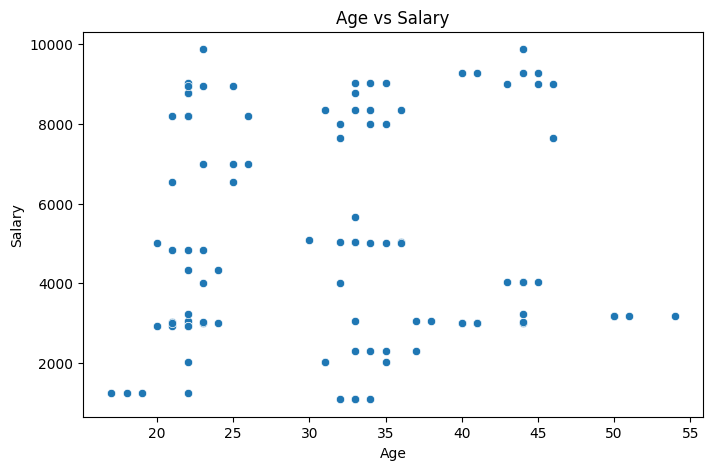

In [219]:
#b)Plot the chart with age and salary
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Age'], y=df['Salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

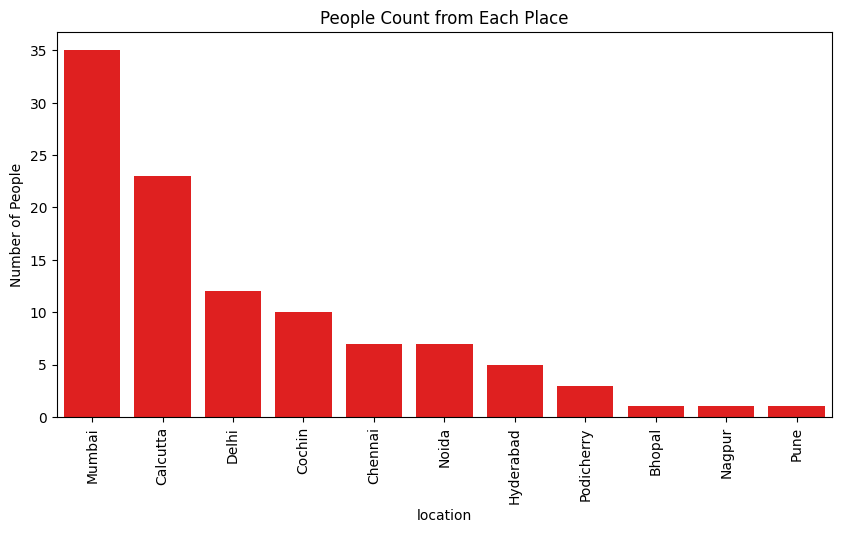

In [220]:
#Count the number of people from each place and represent it visually
place_counts = df['Location'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=place_counts.index, y=place_counts.values,color='red')
plt.xticks(rotation=90)
plt.xlabel("location")
plt.ylabel("Number of People")
plt.title("People Count from Each Place")
plt.show()

**Data Encoding:**

a)Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.


In [221]:
categorical_col = ['Company', 'Location', 'Country']

In [222]:
numerical_col =['Age','Salary']

In [223]:
#using labelencoder
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])
df_le= pd.get_dummies(df, columns=['Company', 'Location'], drop_first=True)



In [224]:
df.head()

,Company,Age,Salary,Location,Country,Gender
2,2,35.0,2300.0,1,0,0
3,1,40.0,3000.0,4,0,0
4,2,23.0,4000.0,6,0,0
7,1,23.0,7000.0,6,0,1
8,2,34.0,8000.0,1,0,1


In [225]:
#using onehotencoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

In [226]:

encoded_data = ohe.fit_transform(df[categorical_col])
df_ohe = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_col))
df_ohe = pd.concat([df, df_ohe], axis=1)
df_ohe.head()

,Company,Age,Salary,Location,Country,Gender,Company_1,Company_2,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9,Location_10
2,2.0,35.0,2300.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,40.0,3000.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.0,23.0,4000.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,23.0,7000.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,2.0,34.0,8000.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
df.columns

Index(['Company', 'Age', 'Salary', 'Location', 'Country', 'Gender'], dtype='object')

**Feature Scaling:**

After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.


In [228]:
# scaling using standardscaler
scaler_std = StandardScaler()
df[['Age_Std', 'Salary_Std']] = scaler_std.fit_transform(df[numerical_col])


In [229]:
# scaling using minmaxscaler
scaler_minmax = MinMaxScaler()
df[['Age_MinMax', 'Salary_MinMax']] = scaler_minmax.fit_transform(df[numerical_col])

In [230]:
df.head()

,Company,Age,Salary,Location,Country,Gender,Age_Std,Salary_Std,Age_MinMax,Salary_MinMax
2,2,35.0,2300.0,1,0,0,0.361350,-1.062520,0.486486,0.137817
3,1,40.0,3000.0,4,0,0,0.909642,-0.806062,0.621622,0.217480
4,2,23.0,4000.0,6,0,0,-0.954550,-0.439694,0.162162,0.331285
7,1,23.0,7000.0,6,0,1,-0.954550,0.659410,0.162162,0.672698
8,2,34.0,8000.0,1,0,1,0.251692,1.025779,0.459459,0.786503
